<a href="https://colab.research.google.com/github/ToddMG/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/TG_LS_DS7_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd

###Load in CSV

In [0]:
#Load csv from  github raw
df = pd.read_csv('https://raw.githubusercontent.com/ToddMG/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

###Check attributes

In [4]:
#Check rows and columns
print(df.shape, '\n')

#Check data types of each column
print(df.info())

#Check for any missing variables
print('\n', df.isna().sum())

df.head(10)

(1200, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB
None

 Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


###Fix dataset

In [5]:
df = df.rename(columns={'Unnamed: 0': 'ID'}) #Rename unnamed column to ID
df.head(5)

,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


**For my test, I will be using exercise time as the target and age as the independent variable.**

***Hypothesis*: as people age their tendency to exercise decreases.**

###Data Analysis

In [0]:
time_bins = pd.cut(df['exercise_time'], 3)  # 6 equal-sized bins
age_bins = pd.cut(df['age'], 6) # 6 equal-sized bins

#crosstab = pd.crosstab(time_bins, age_bins) #Gives an error. Need to downgrade pandas.

###Downgrading Pandas Library

In [0]:
!pip install pandas==0.23.4

###Back to Analysis

In [14]:
#Create cross tab with age_bins and time_bins, normalize the results and store it into a variable for later use.
crosstab = pd.crosstab(age_bins, time_bins, normalize='columns')
crosstab

exercise_time,"(-0.3, 100.0]","(100.0, 200.0]","(200.0, 300.0]"
age,,,
"(17.938, 28.333]",0.126733,0.203125,0.215434
"(28.333, 38.667]",0.158416,0.184896,0.212219
"(38.667, 49.0]",0.132673,0.132812,0.263666
"(49.0, 59.333]",0.110891,0.151042,0.225080
"(59.333, 69.667]",0.192079,0.179688,0.083601
"(69.667, 80.0]",0.279208,0.148438,0.000000


###Let's do some plotting to better visualize the data.

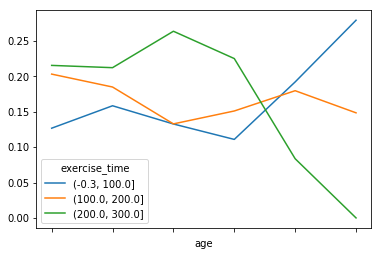

In [9]:
crosstab.plot();
#We can observe as age reaches 50 longer exercise times decrease sharply.
#As age increases, shortest exercise times increase sharply

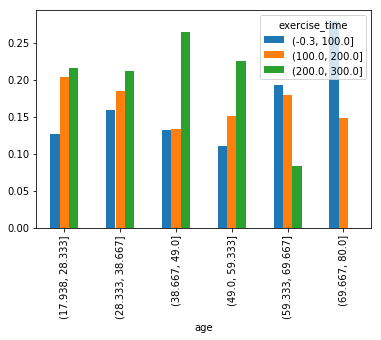

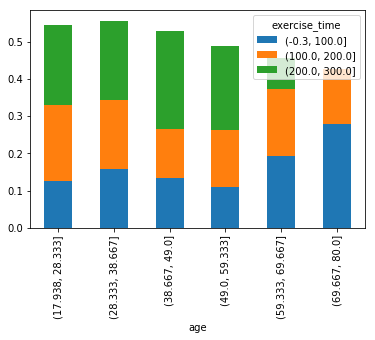

In [15]:
#Another plot
crosstab.plot(kind='bar');
#This plot helps us visualize the cross point where exercise times are favored almost equally. From ages 55-68.
#We also see longer exercise times tend to peak around 40-50 years old.

crosstab.plot(kind='bar', stacked=True);
#This plot helps visualize total exercise's downward trend as age increases.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
* Integers
2.  What are the relationships between the variables?
* From my test, age tends to decrease exercise time, especially after the age of 55.
* Weight would most likely decrease as exercise time increases
* Exercise time would most likely decrease as weight increases
* Age would most likely decrease as weight increases
3.  Which relationships are "real", and which spurious?
* I would say every relationship I pointed out previously is real for the most part. However, I would be inclined to say exercise time doesn't directly depend on weight. Factors like motivation, spare income and time would be more likely contributing factors.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)